# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shanshanzhang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
/Users/shanshanzhang/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("News_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_news["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,Compound,Negative,Neutral,Positive,text
0,0.2960,0.0,0.942,0.058,Shares of Square are up more than 6% today aft...
1,0.0000,0.0,1.000,0.000,Tesla’s relationship with bitcoin is not a dal...
2,0.7506,0.0,0.829,0.171,Cryptocurrency continues to gain mainstream ac...
3,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...
4,0.0000,0.0,1.000,0.000,Cryptocurrency prices continued to tumble Frid...


In [7]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_news["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth = pd.DataFrame(sentiments)
eth.head()

,Compound,Negative,Neutral,Positive,text
0,-0.4019,0.15,0.778,0.072,Their investors call them disruptive innovator...
1,0.7506,0.00,0.829,0.171,Cryptocurrency continues to gain mainstream ac...
2,0.0258,0.00,0.966,0.034,Venmo is jumping aboard the cryptocurrency ban...
3,0.0000,0.00,1.000,0.000,New York (CNN Business)Bitcoin prices continue...
4,0.4754,0.00,0.909,0.091,"The creators behind CryptoPunks, one of the mo..."


In [8]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.284405,0.010300,0.911300,0.078450
std,0.349831,0.025375,0.083582,0.078992
min,-0.381800,0.000000,0.777000,0.000000
25%,0.000000,0.000000,0.828250,0.000000
50%,0.296000,0.000000,0.927000,0.062000
75%,0.634375,0.000000,1.000000,0.160250
max,0.845500,0.080000,1.000000,0.217000


In [9]:
# Describe the Ethereum Sentiment
eth.describe()


,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.111150,0.011200,0.946050,0.042750
std,0.299861,0.036611,0.071028,0.059798
min,-0.401900,0.000000,0.778000,0.000000
25%,0.000000,0.000000,0.924000,0.000000
50%,0.000000,0.000000,0.964000,0.017000
75%,0.164300,0.000000,1.000000,0.064500
max,0.817600,0.150000,1.000000,0.210000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC has higer mean positive score 

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lem = WordNetLemmatizer() 

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append("it'")
sw.append("'s")
sw.append('…')
sw = set(sw)

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a tokenized list of the words
    words = word_tokenize(text)
   
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
   
   
    # Lemmatize words into root words
    tokens = [lem.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in sw, words))
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
tokenizer(text)

['Ethereum',
 'ha',
 'outperformed',
 'major',
 'digital',
 'currency',
 'rival',
 'this',
 'year',
 'bolstered',
 'by',
 'the',
 'surge',
 'in',
 'decentralized',
 'finance',
 'DeFi',
 'and',
 'the',
 'anticipation',
 'of',
 'a',
 'technical',
 'adjustment',
 'this',
 'summer',
 'but',
 'it',
 'face',
 'hurd…',
 '+5218',
 'char']

In [15]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.4019,0.15,0.778,0.072,Their investors call them disruptive innovator...,"[Their, investor, call, them, disruptive, inno..."
1,0.7506,0.00,0.829,0.171,Cryptocurrency continues to gain mainstream ac...,"[Cryptocurrency, continues, to, gain, mainstre..."
2,0.0258,0.00,0.966,0.034,Venmo is jumping aboard the cryptocurrency ban...,"[Venmo, is, jumping, aboard, the, cryptocurren..."
3,0.0000,0.00,1.000,0.000,New York (CNN Business)Bitcoin prices continue...,"[New, York, CNN, Business, Bitcoin, price, con..."
4,0.4754,0.00,0.909,0.091,"The creators behind CryptoPunks, one of the mo...","[The, creator, behind, CryptoPunks, one, of, t..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'By'), 4),
 (('By', 'Reuters'), 4),
 (('Reuters', 'Staff'), 4),
 (('to', 'the'), 3),
 (('said', 'on'), 3),
 (('of', 'the'), 3),
 (('Shares', 'of'), 2),
 (('’', 's'), 2),
 (('by', 'the'), 2),
 (('char', 'Cryptocurrency'), 2),
 (('to', 'it'), 2),
 (('Venmo', 'app'), 2),
 (('char', 'The'), 2),
 (('a', 'a'), 2),
 (('ha', 'seen'), 2),
 (('seen', 'a'), 2),
 (('institutional', 'investor'), 2),
 (('price', 'continued'), 2),
 (('for', 'the'), 2),
 (('Tesla', 'ha'), 2)]

In [18]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('of', 'a'), 7),
 (('char', 'By'), 4),
 (('By', 'Reuters'), 4),
 (('Reuters', 'Staff'), 4),
 (('A', 'representation'), 4),
 (('representation', 'of'), 4),
 (('of', 'virtual'), 4),
 (('virtual', 'currency'), 4),
 (('currency', 'Ethereum'), 4),
 (('Ethereum', 'are'), 4),
 (('are', 'seen'), 4),
 (('seen', 'in'), 4),
 (('in', 'front'), 4),
 (('front', 'of'), 4),
 (('a', 'stock'), 4),
 (('stock', 'graph'), 4),
 (('graph', 'in'), 4),
 (('in', 'this'), 4),
 (('this', 'illustration'), 4),
 (('illustration', 'taken'), 4)]

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
top_tokens = tokenizer(btc.text.str.cat())
token_count(top_tokens, 10)

[('the', 27),
 ('of', 20),
 ('a', 20),
 ('char', 20),
 ('it', 14),
 ('to', 14),
 ('in', 13),
 ('and', 13),
 ('that', 11),
 ('Bitcoin', 8)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
tokens_eth = tokenizer(eth.text.str.cat())
token_count(tokens_eth, 10)

[('a', 26),
 ('of', 22),
 ('char', 20),
 ('the', 18),
 ('in', 14),
 ('and', 12),
 ('to', 12),
 ('Ethereum', 8),
 ('this', 8),
 ('on', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [53]:
def wordcloud(text):
    word_cloud = WordCloud(width=1200, height=800).generate(text)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

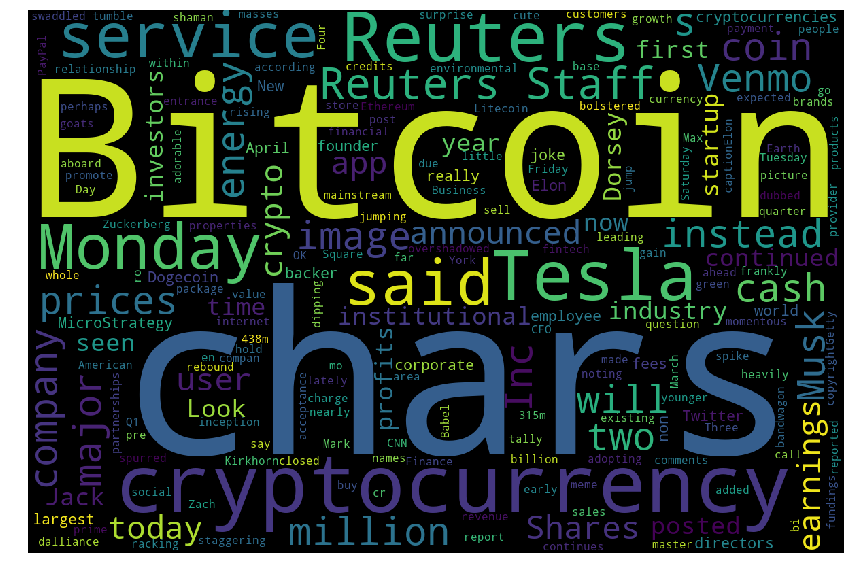

In [54]:
# Generate the Bitcoin word cloud
wordcloud(btc.text.str.cat())

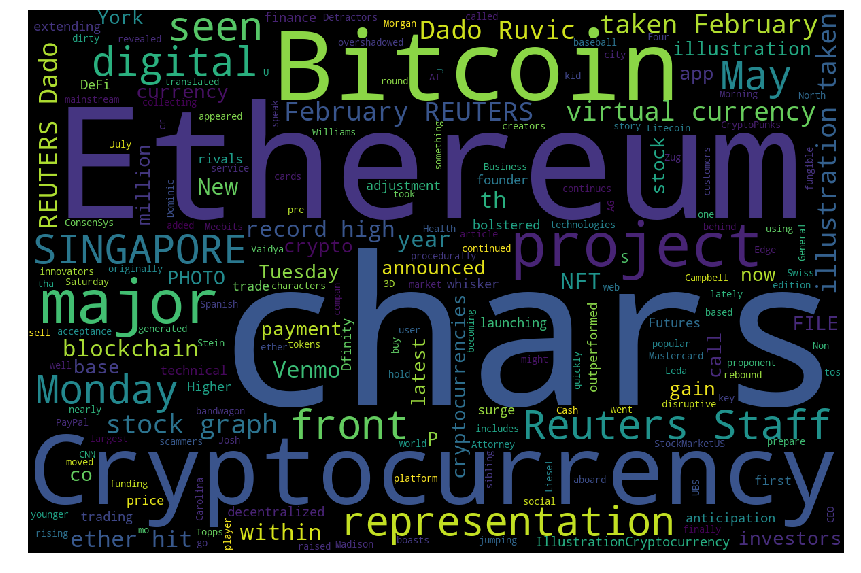

In [55]:
# Generate the Ethereum word cloud
wordcloud(eth.text.str.cat())

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [52]:
import spacy
from spacy import displacy

In [56]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [57]:
# Load the spaCy model
Smodel = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [58]:
# Concatenate all of the Bitcoin text together
BTC_texts = btc.text.str.cat()

In [59]:
# Run the NER processor on all of the text
doc = Smodel(BTC_texts)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [60]:
# Render the visualization
displacy.render(doc, style='ent')


In [65]:
# List all Entities
print([ent.text for ent in doc.ents])

['more than 6%', 'today', 'American', '$5.06 billion', '2021', '3.36', 'CFO', 'Zach Kirkhorn', 'Monday', 'PayPal', 'Bitcoin, Ethereum', 'Bitcoin Cash', 'Litecoin', 'Venmo', '70 million', 'a momentous year', '2020', 'Friday', 'Bitcoin', '50,000', 'first', 'early March', 'Bitcoin', 'Zuckerberg', 'two', 'Max', 'Bitcoin', 'Musk', 'Tesla', 'Tesla', 'first quarter', '$438m', '315', 'Bitcoin', 'Jack Dorsey', 'Babel Finance', 'Monday', 'Tuesday', 'Venmo', 'Four', 'chars]New York', 'CNN', 'Saturday', 'about 6%', 'nearly $58,000', 'Reuters', 'Reuters', 'Inc', 'Monday', 'two', 'Crusoe Energy', 'two', 'today', 'Musk', 'Dogecoin', 'Twitter', 'Dogecoin', 'Reuters', 'April 12', 'Reuters', 'Monday', 'Dorsey', 'Twitter', 'Wednesday', 'Elon Musk', 'BBC', 'Kuber', 'India', 'Thursday', '$25 million', 'Indi', 'Reuters', 'April 18', 'Reuters', '7.7%', '55,408.08', 'Sunday', '4,624.21', 'Reuters', 'Santa Clarita', 'California', 'U.S.', 'October 2, 2019', 'Mike Blake\r\n', 'Reuters', '$27 million']


---

### Ethereum NER

In [66]:
# Concatenate all of the Ethereum text together
ETH_texts = eth.text.str.cat()

In [76]:

eth_doc = Smodel(ETH_texts)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [77]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [79]:
# List all Entities
print([ent.text for ent in eth_doc.ents])

['North Carolina', 'Josh Stein', 'Madison Campbell', 'Liesel Vaidya', 'PayPal', 'Bitcoin, Ethereum', 'Bitcoin Cash', 'Litecoin', 'Venmo', '70 million', 'Tuesday', 'Venmo', 'Four', 'chars]New York', 'CNN', 'Saturday', 'about 6%', 'nearly $58,000', 'CryptoPunks', 'one', 'NFT', 'Meebits', '20,000', '3D', 'Ethereum', '$65 million', 'J.P. Morgan', 'Mastercard', 'UBS AG', 'Reuters', 'February 19, 2021', 'SINGAPORE', 'February 19, 2021', 'Dado Ruvic/IllustrationCryptocurrency', 'Dfinity', 'July 2018', 'Swiss', 'Dominic Williams', 'StockMarketUS Stock Futures Edge Higher', 'Monday', 'U.S.', 'Monday', 'Topps', 'first', 'NFT', 'Spanish', 'AI', 'Cryptocurrencies', 'today', 'Vitalik Buterin', '27-year-old', 'Reuters', 'SINGAPORE', 'May 3', 'Reuters', 'Monday', '3,000', 'last weeks', 'Europe', 'February 19, 2021', 'Dado Ruvic/IllustrationCryptocurrency', 'Dow Jones Indices', 'Tuesday', 'Banksy', 'Love', 'Air', 'first', 'chars]NEW YORK', 'May 7', 'Reuters', 'this year', 'Reuters', 'SINGAPORE', 'May 

---